In [31]:
# Path: pandas/getting_started.ipynb
import pandas as pd
na_vals = ['NA', 'Missing']

df = pd.read_csv("./data/survey_results_public.csv", index_col="Respondent", na_values=na_vals)

In [3]:
df.head(10)

,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
Respondent,,,,,,,,,,,,,,,,,,,,,
1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or ...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,Taken an online course in programming or softw...,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,"Taught yourself a new language, framework, or ...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy
6,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Canada,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,Taken an online course in programming or softw...,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,28.0,Man,No,Straight / Heterosexual,East Asian,No,Too long,Neither easy nor difficult
7,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,"Independent contractor, freelancer, or self-em...",Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Another engineering discipline (ex. civil, ele...","Taught yourself a new language, framework, or ...",...,A lot more welcome now than last year,NaN,42.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Neither easy nor difficult
8,I code primarily as a hobby,Yes,Less than once per year,"OSS is, on average, of HIGHER quality than pro...","Not employed, but looking for work",India,NaN,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...","Taught yourself a new language, framework, or ...",...,A lot more welcome now than last year,Tech articles written by other developers;Indu...,24.0,Man,No,Straight / Heterosexual,NaN,NaN,Appropriate in length,Neither easy nor difficult
9,I am a developer by profession,Yes,On

In [4]:
df.shape

(88883, 84)

In [5]:
pd.set_option("display.max_columns", 30)
pd.set_option("display.max_rows", 30)

In [6]:
schema_df = pd.read_csv("./data/survey_results_schema.csv", index_col="Column")

In [7]:
schema_df

,QuestionText
Column,
Respondent,Randomized respondent ID number (not in order ...
MainBranch,Which of the following options best describes ...
Hobbyist,Do you code as a hobby?
OpenSourcer,How often do you contribute to open source?
OpenSource,How do you feel about the quality of open sour...
...,...
Sexuality,Which of the following do you currently identi...
Ethnicity,Which of the following do you identify as? Ple...
Dependents,"Do you have any dependents (e.g., children, el..."


In [8]:
df["Hobbyist"].value_counts()

Hobbyist
Yes    71257
No     17626
Name: count, dtype: int64

In [9]:
countries = [
    "United States",
    "India",
    "United Kingdom",
    "Germany",
    "Canada",
]

In [10]:
filt = df["Country"].isin(countries)

In [11]:
df.loc[filt, ["Country", "LanguageWorkedWith", "ConvertedComp"]]

,Country,LanguageWorkedWith,ConvertedComp
Respondent,,,
1,United Kingdom,HTML/CSS;Java;JavaScript;Python,NaN
4,United States,C;C++;C#;Python;SQL,61000.0
6,Canada,Java;R;SQL,366420.0
8,India,Bash/Shell/PowerShell;C;C++;HTML/CSS;Java;Java...,NaN
10,India,C#;Go;JavaScript;Python;R;SQL,13293.0
...,...,...,...
85642,United States,Go;HTML/CSS,NaN
85961,United Kingdom,C;C++;Other(s):,NaN
86012,India,Bash/Shell/PowerShell;C++;HTML/CSS;JavaScript,NaN


In [12]:
s_filt = df["LanguageWorkedWith"].str.contains("Python", na=False)

df.loc[s_filt, ["Country", "LanguageWorkedWith", "ConvertedComp"]]

,Country,LanguageWorkedWith,ConvertedComp
Respondent,,,
1,United Kingdom,HTML/CSS;Java;JavaScript;Python,NaN
2,Bosnia and Herzegovina,C++;HTML/CSS;Python,NaN
4,United States,C;C++;C#;Python;SQL,61000.0
5,Ukraine,C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA,NaN
8,India,Bash/Shell/PowerShell;C;C++;HTML/CSS;Java;Java...,NaN
...,...,...,...
84539,United Kingdom,Bash/Shell/PowerShell;C;C++;HTML/CSS;Java;Java...,NaN
85738,Brazil,Bash/Shell/PowerShell;C++;Python;Ruby;Other(s):,NaN
86566,Switzerland,Bash/Shell/PowerShell;HTML/CSS;Python;Other(s):,NaN


In [13]:
df.sort_values(by=["Country", "ConvertedComp"], ascending=[True, False], inplace=True)
df[["Country", "ConvertedComp"]].head(50)

,Country,ConvertedComp
Respondent,,
63129,Afghanistan,1000000.0
50499,Afghanistan,153216.0
39258,Afghanistan,19152.0
58450,Afghanistan,17556.0
7085,Afghanistan,14364.0
...,...,...
3787,Albania,114550.0
9270,Albania,74474.0
6716,Albania,60000.0


In [14]:
df[["Country", "ConvertedComp"]].tail(50)

,Country,ConvertedComp
Respondent,,
55805,NaN,NaN
56293,NaN,NaN
56434,NaN,NaN
56601,NaN,NaN
57311,NaN,NaN
...,...,...
88062,NaN,NaN
88076,NaN,NaN
88601,NaN,NaN


In [15]:
df["ConvertedComp"].head(15)

Respondent
63129    1000000.0
50499     153216.0
39258      19152.0
58450      17556.0
7085       14364.0
22450       7980.0
48436       4464.0
10746       3996.0
8149        1596.0
29736       1116.0
722            0.0
28638          0.0
6417           NaN
7353           NaN
12310          NaN
Name: ConvertedComp, dtype: float64

In [16]:
df["ConvertedComp"].median()

57287.0

In [17]:
df.median(numeric_only=True)

CompTotal        62000.0
ConvertedComp    57287.0
WorkWeekHrs         40.0
CodeRevHrs           4.0
Age                 29.0
dtype: float64

In [18]:
df.describe()

,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,5.594500e+04,5.582300e+04,64503.000000,49790.000000,79210.000000
mean,5.519014e+11,1.271107e+05,42.127197,5.084308,30.336699
std,7.331926e+13,2.841523e+05,37.287610,5.513931,9.178390
min,0.000000e+00,0.000000e+00,1.000000,0.000000,1.000000
25%,2.000000e+04,2.577750e+04,40.000000,2.000000,24.000000
50%,6.200000e+04,5.728700e+04,40.000000,4.000000,29.000000
75%,1.200000e+05,1.000000e+05,44.750000,6.000000,35.000000
max,1.000000e+16,2.000000e+06,4850.000000,99.000000,99.000000


In [19]:
df["Hobbyist"].value_counts()

Hobbyist
Yes    71257
No     17626
Name: count, dtype: int64

In [20]:
df["SocialMedia"].value_counts(normalize=True)

SocialMedia
Reddit                      0.170233
YouTube                     0.163791
WhatsApp                    0.158071
Facebook                    0.156069
Twitter                     0.134988
Instagram                   0.074150
I don't use social media    0.065777
LinkedIn                    0.053306
WeChat 微信                   0.007899
Snapchat                    0.007437
VK ВКонта́кте               0.007141
Weibo 新浪微博                  0.000663
Youku Tudou 优酷              0.000249
Hello                       0.000225
Name: proportion, dtype: float64

In [21]:
df["Country"].value_counts()

Country
United States                       20949
India                                9061
Germany                              5866
United Kingdom                       5737
Canada                               3395
                                    ...  
North Korea                             1
Niger                                   1
Saint Vincent and the Grenadines        1
Chad                                    1
Brunei Darussalam                       1
Name: count, Length: 179, dtype: int64

In [22]:
country_group = df.groupby(["Country"])

In [23]:
country_group.get_group("India")

,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,...,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
Respondent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
22013,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,India,No,"Professional degree (JD, MD, etc.)","A natural science (ex. biology, chemistry, phy...",Taken an online course in programming or softw...,2-9 employees,Academic researcher;Data scientist or machine ...,3,26,3,...,Yes,I have never participated in Q&A on Stack Over...,Yes,Yes,"Yes, definitely",A lot more welcome now than last year,Tech articles written by other developers;Indu...,NaN,Man,No,Straight / Heterosexual,NaN,Yes,Too long,Easy
28243,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...","Independent contractor, freelancer, or self-em...",India,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,2-9 employees,"Developer, back-end;Developer, full-stack;Deve...",25,9,14,...,Yes,Multiple times per day,Yes,"No, and I don't know what those are","Yes, definitely",A lot less welcome now than last year,Tech meetups or events in your area,NaN,NaN,NaN,Straight / Heterosexual,NaN,Yes,Too short,Easy
72732,"I am not primarily a developer, but I write co...",No,Less than once a month but more than once per ...,"OSS is, on average, of LOWER quality than prop...",NaN,India,"Yes, full-time","Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Contributed to open source software,NaN,NaN,4,20,5,...,Yes,A few times per month or weekly,Yes,"No, and I don't know what those are",Not sure,A lot less welcome now than last year,Tech articles written by other developers;Tech...,NaN,Man,No,NaN,NaN,Yes,Too long,Easy
16793,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...","Independent contractor, freelancer, or self-em...",India,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,"Just me - I am a freelancer, sole proprietor, ...",Academic researcher;Data or business analyst;D...,14,14,6,...,Yes,A few times per week,"No, I didn't know that Stack Overflow had a jo...","No, and I don't know what those are","Yes, definitely",Somewhat more welcome now than last year,Tech articles written by other developers;Indu...,27.0,Man,No,Straight / Heterosexual,South Asian,Yes,Appropriate in length,Neither easy nor difficult
52561,I am a developer by profession,Yes,Never,"OSS is, on average, of LOWER quality than prop...",Employed full-time,India,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,"5,000 to 9,999 employees","Developer, back-end;Developer, desktop or ente...",12,11,9,...,Yes,A few times per month or weekly,Yes,"No, I've heard of them, but I am not part of a...","Yes, definitely",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,31.0,Man,No,Straight / Heterosexual,South Asian,Yes,Too long,Easy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77339,NaN,Yes,Less than once per year,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,India,"Yes, full-time","Bachelor’s degree (BA, BS, B.Eng., etc.)","Another engineering discipline (ex. civil, ele...",Taken an online course in programming or softw...,"1,000 to 4,999 employees",NaN,1,27,1,...,Yes,I have never participated in Q&A on Stack Over...,"No, I didn't kno

In [24]:
country_group["SocialMedia"].value_counts().head(50)

Country      SocialMedia             
Afghanistan  Facebook                    15
             YouTube                      9
             I don't use social media     6
             WhatsApp                     4
             Instagram                    1
                                         ..
Argentina    LinkedIn                    16
Armenia      Facebook                    38
             YouTube                     23
             LinkedIn                     5
             Instagram                    3
Name: count, Length: 50, dtype: int64

<Axes: >

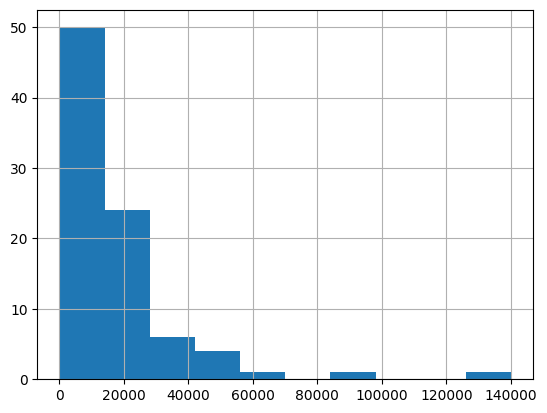

In [25]:
country_group["ConvertedComp"].get_group("Viet Nam").hist()

In [26]:
filt = df["Country"] == "India"
df.loc[filt]["LanguageWorkedWith"].str.contains("Python").sum()

3105

In [27]:
country_group["LanguageWorkedWith"].apply(lambda x: x.str.contains("Python").sum()).sort_values(ascending=False)

Country
United States     10083
India              3105
Germany            2451
United Kingdom     2384
Canada             1558
                  ...  
Malawi                0
Tonga                 0
Djibouti              0
Liberia               0
Cape Verde            0
Name: LanguageWorkedWith, Length: 179, dtype: int64

In [28]:
country_respondents = df["Country"].value_counts()
country_respondents

Country
United States                       20949
India                                9061
Germany                              5866
United Kingdom                       5737
Canada                               3395
                                    ...  
North Korea                             1
Niger                                   1
Saint Vincent and the Grenadines        1
Chad                                    1
Brunei Darussalam                       1
Name: count, Length: 179, dtype: int64

In [29]:
country_use_python = country_group["LanguageWorkedWith"].apply(lambda x: x.str.contains("Python").sum())
country_use_python

Country
Afghanistan                              8
Albania                                 23
Algeria                                 40
Andorra                                  0
Angola                                   2
                                        ..
Venezuela, Bolivarian Republic of...    28
Viet Nam                                78
Yemen                                    3
Zambia                                   4
Zimbabwe                                14
Name: LanguageWorkedWith, Length: 179, dtype: int64

In [30]:
python_percents = (country_use_python / country_respondents * 100)
python_percents.sort_values(ascending=False)

Country
Dominica                            100.000000
Niger                               100.000000
Timor-Leste                         100.000000
Sao Tome and Principe               100.000000
Turkmenistan                         85.714286
                                       ...    
Tonga                                 0.000000
North Korea                           0.000000
Papua New Guinea                      0.000000
Tajikistan                            0.000000
Lao People's Democratic Republic      0.000000
Length: 179, dtype: float64

In [36]:
df["YearsCode"].replace("Less than 1 year", 0, inplace=True)
df["YearsCode"].replace("More than 50 years", 51, inplace=True)

In [39]:
df["YearsCode"] = df["YearsCode"].astype(float)

<Axes: >

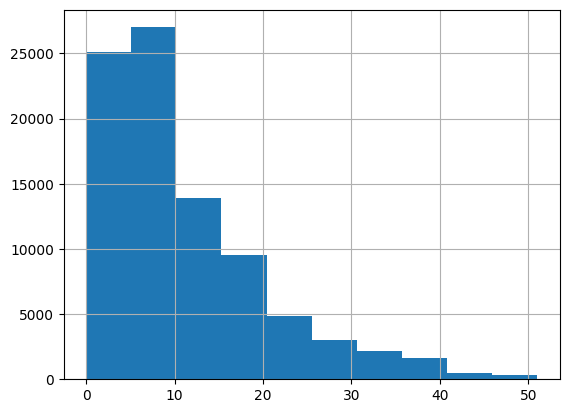

In [42]:
df["YearsCode"].hist()